# **Actividad de Interpolación**

Por: Juan Manuel Calvo Duque
Programación para Ingeniería - Maestría en Ingeniería Cohorte VIII

In [ ]:
#Importar las librerias necesarias para el desarrollo de la actividad
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd

## Optimizar mediante Rectitud

### Mediante Lagrange

In [3]:
#Se agregan los vectores de ángulo y las relaciones de longitudes según la rectitud
angulo = [20, 40, 60, 80, 100, 120, 140, 160, 180]
L1_L2 = [2.975, 2.95, 2.9, 2.825, 2.725, 2.625, 2.5, 2.35, 2.2]
L3_L2 = [3.963, 3.925, 3.85, 3.738, 3.588, 3.438, 3.25, 3.025, 2.8]
Lx_L2 = [0.601, 1.193, 1.763, 2.299, 2.790, 3.238, 3.623, 3.933, 4.181]

In [4]:
#Cálculo de los polinomios para cada relación de longitud
p1, p2, p3 = [lagrange(angulo,L1_L2), lagrange(angulo,L3_L2), lagrange(angulo,Lx_L2)]

In [5]:
#Generación de spacio para calcular interpolaciones
X = np.linspace(20,180,100)

In [6]:
y1, y2, y3 = [p1(X), p2(X), p3(X)]

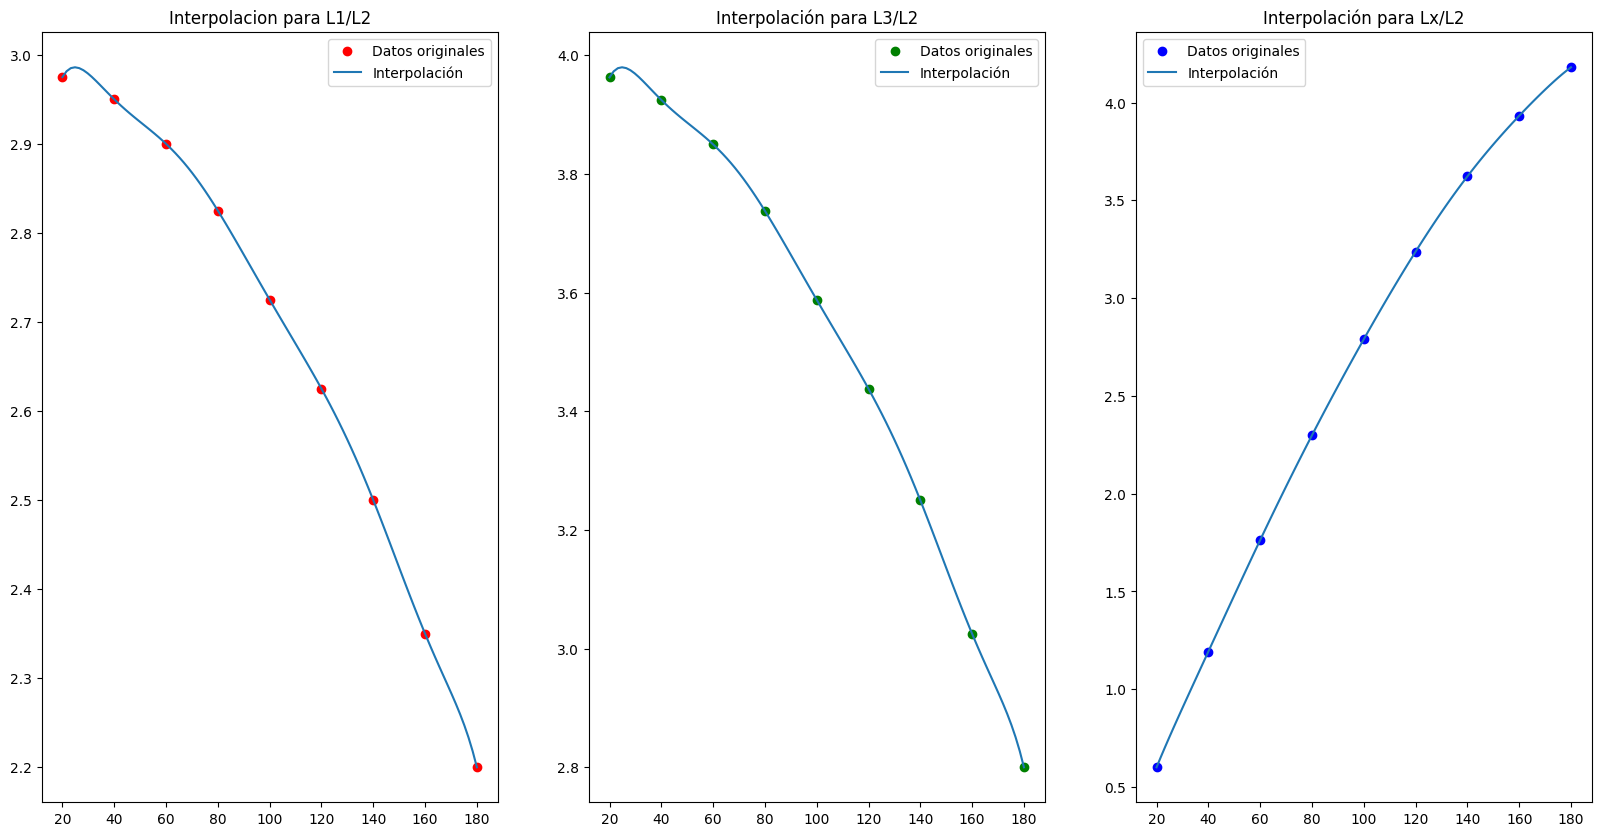

In [7]:
#Graficas de los datos originales y sus interpolaciones para cada relación de longitudes
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].plot(angulo, L1_L2, 'ro', label='Datos originales')
axs[0].plot(X, y1, '-', label='Interpolación')
axs[0].set_title('Interpolacion para L1/L2')
axs[0].legend()

axs[1].plot(angulo, L3_L2, 'go', label='Datos originales')
axs[1].plot(X, y2, '-', label='Interpolación')
axs[1].set_title('Interpolación para L3/L2')
axs[1].legend()

axs[2].plot(angulo, Lx_L2, 'bo', label='Datos originales')
axs[2].plot(X, y3, '-', label='Interpolación')
axs[2].set_title('Interpolación para Lx/L2')
axs[2].legend()


Calcular longitudes para 30 y 55, teniendo en cuenta que:

$$ L_2(x) = \frac{\Delta x}{p_3(x)} $$

$$ L_3(x) = L_2(x)*p_2(x) $$

$$ L_1(x) = L_2(x)*p_1(x)  $$
$$ L_4(x) = L_3(x) $$


In [8]:
#Definir la longitud del segmento
Lx = 20

In [9]:
#Calcular L1, L2, L3 y L4 para 30 grados
L2_30 = Lx/p3(30)
L3_30 = L2_30*p2(30)
L1_30 = L2_30*p1(30)
L4_30 = L3_30

In [10]:
#Calcular L1, L2, L3 y L4 para 55 grados
L2_55 = Lx/p3(55)
L3_55 = L2_55*p2(55)
L1_55 = L2_55*p1(55)
L4_55 = L3_55

### Mediante el método Interp de Numpy

In [12]:
# Realizar la interpolación mediante el método interp
y1_numpy = np.interp(X, angulo, L1_L2)
y2_numpy = np.interp(X, angulo, L3_L2)
y3_numpy = np.interp(X, angulo, Lx_L2)

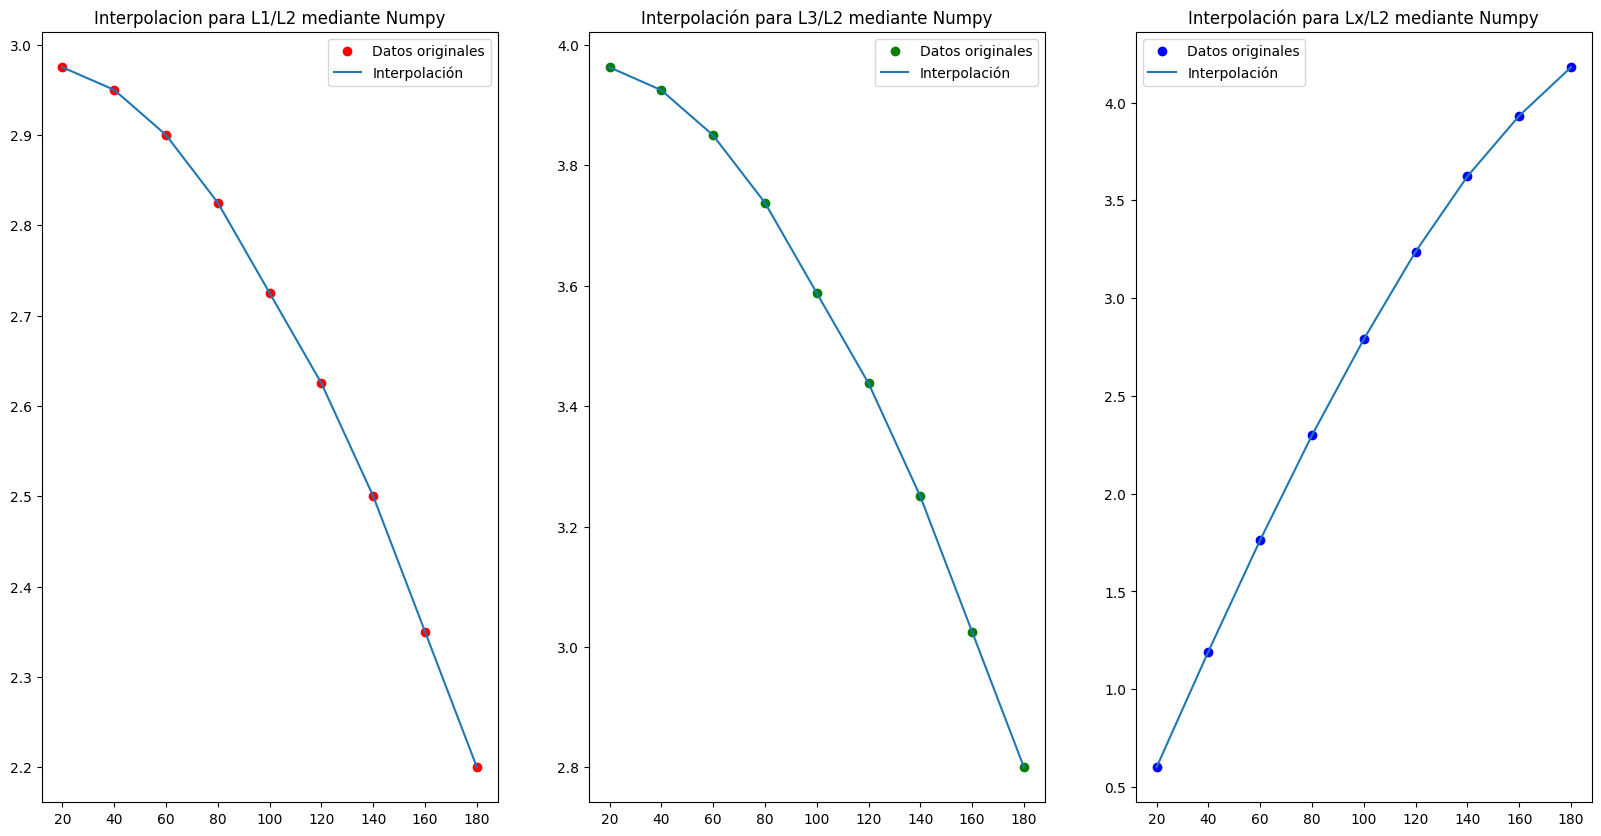

In [13]:
#Graficar las interpolaciones calculadas mediante Numpy y los datos originales
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].plot(angulo, L1_L2, 'ro', label='Datos originales')
axs[0].plot(X, y1_numpy, '-', label='Interpolación')
axs[0].set_title('Interpolacion para L1/L2 mediante Numpy')
axs[0].legend()

axs[1].plot(angulo, L3_L2, 'go', label='Datos originales')
axs[1].plot(X, y2_numpy, '-', label='Interpolación')
axs[1].set_title('Interpolación para L3/L2 mediante Numpy')
axs[1].legend()

axs[2].plot(angulo, Lx_L2, 'bo', label='Datos originales')
axs[2].plot(X, y3_numpy, '-', label='Interpolación')
axs[2].set_title('Interpolación para Lx/L2 mediante Numpy')
axs[2].legend()